In [143]:
import numpy as np
import pandas as pd

In [142]:

df = pd.read_csv(r'C:\Users\Rohan\Downloads\NLP MIni\Restaurant reviews.csv')


In [144]:
df.shape

(10000, 8)

In [145]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

In [146]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


# **Data Preprocessing**

In [147]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [18]:
corpus[0:10]

['say good ice cream would sure recommend cooki creme ice cream good',
 'nice littl local place ice cream favorit pumpkin shake fall season special sweet toler low larg size ice cream usual seem sweet ice cream love pina colada refresh banana split good',
 'delici treat hot day staff friendli help gave us sampl let us order littl earlier open',
 'great servic fun crew got banana cream pie chocol ice cream love flavor freshli cut banana graham cracker chocol ice cream yum thing notic melt pretti fast bit ici like creamier ice cream bit overrun prefer overal delici',
 'one favorit place get ice cream cu area bit drive worth minut far side urbana get realli easi atmospher dairi barn kid friendli mani tabl set sit enjoy ice cream friend went line minut wait seem like time older gentlemen presum manag owner give sampl entir line could tell took pride product made excit share everyon special night cappuccino ice cream ad cooki dough make tornado blizzard like ice cream treat quit refresh nic

In [150]:
from sklearn.utils import resample

# Randomly subsample y to match the number of samples in X
y_subsampled = resample(y, n_samples=1000, random_state=0)

# Now, split X_subsampled and y_subsampled
X_train, X_test, y_train, y_test = train_test_split(X, y_subsampled, test_size=0.20, random_state=0)


In [199]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# **Model Building**

In [198]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [200]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

                                                 Review  compound_score   
0     The ambience was good, food was quite good . h...          0.9664  \
1     Ambience is too good for a pleasant evening. S...          0.9360   
2     A must try.. great food great ambience. Thnx f...          0.9186   
3     Soumen das and Arun was a great guy. Only beca...          0.8591   
4     Food is good.we ordered Kodi drumsticks and ba...          0.9201   
...                                                 ...             ...   
9995  Madhumathi Mahajan Well to start with nice cou...          0.9923   
9996  This place has never disappointed us.. The foo...          0.9579   
9997  Bad rating is mainly because of "Chicken Bone ...          0.9785   
9998  I personally love and prefer Chinese Food. Had...          0.9359   
9999  Checked in here to try some delicious chinese ...          0.8516   

     sentiment  
0     Positive  
1     Positive  
2     Positive  
3     Positive  
4     Positive

In [201]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred, average='macro')
score3 = recall_score(y_test, y_pred, average='macro')

print("---- Scores ----")
print("Accuracy score is: {:.2f}%".format(score1 * 100))
print("Precision score is: {:.2f}".format(score2))
print("Recall score is: {:.2f}".format(score3))


---- Scores ----
Accuracy score is: 43.50%
Precision score is: 0.21
Recall score is: 0.22


In [192]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [193]:
cm

array([[ 0,  0,  1,  3, 11],
       [ 0,  0,  1,  2, 12],
       [ 0,  0,  2,  3, 12],
       [ 0,  5,  3, 13, 30],
       [ 3,  5,  6, 16, 72]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

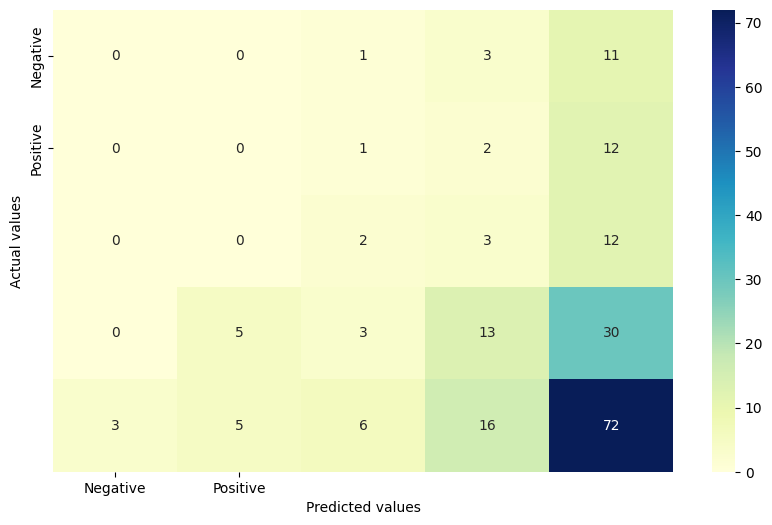

In [173]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [95]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [175]:
import pickle
pickle.dump(classifier,open('review_classifier.pkl','wb'))
model=pickle.load(open('review_classifier.pkl','rb'))

# **Predictions**


In [176]:
# Function to perform sentiment prediction
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Ensure that the input is a list, not a string
    temp = tfidf_vectorizer.transform([final_review])  # Removed .toarray()
    prediction = model.predict(temp)
    return prediction

In [177]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [178]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [180]:
# Predicting values
sample_review = 'bad food.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [181]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Assuming you have your data in a Pandas DataFrame, with text in a column named 'text'
df = pd.read_csv('Yelp Restaurant Reviews.csv')  # Replace with your data file

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1500, stop_words='english')

# Fit and transform your text data to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Text'])

# Save the TF-IDF vectorizer and matrix for later use
with open('tfidf_data.pkl', 'wb') as tfidf_file:
    pickle.dump((tfidf_vectorizer, tfidf_matrix), tfidf_file)


In [182]:
# Load your trained sentiment analysis model
with open('review_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the TF-IDF vectorizer
with open('tfidf_data.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)


In [183]:
# Streamlit app imports
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Load your trained sentiment analysis model
with open('review_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the TF-IDF vectorizer
with open('tfidf_data.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

# Create a Streamlit app
st.title('Sentiment Analysis App')

# Create a text input for user to enter a review
user_input = st.text_area('Enter your review:')

# Function to perform sentiment prediction
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = tfidf_vectorizer.transform([final_review]).toarray()
    prediction = model.predict(temp)
    return prediction

# Button to predict sentiment
if st.button('Predict Sentiment'):
    if user_input:
        # Make a sentiment prediction
        prediction = predict_sentiment(user_input)

        # Define sentiment labels
        sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

        # Display the prediction
        st.write(f'Sentiment: {sentiment_labels[prediction[0]]}')
    else:
        st.write('Please enter a review before predicting sentiment.')


In [185]:

# Streamlit app imports
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Load your trained sentiment analysis model
with open('review_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the TF-IDF vectorizer
with open('tfidf_data.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

# Create a Streamlit app
st.title('Sentiment Analysis App')

# Create a text input for user to enter a review
user_input = st.text_area('Enter your review:')

# Function to perform sentiment prediction
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = tfidf_vectorizer.transform([final_review]).toarray()
    prediction = model.predict(temp)
    return prediction

# Button to predict sentiment
if st.button('Predict Sentiment'):
    if user_input:
        # Make a sentiment prediction
        prediction = predict_sentiment(user_input)

        # Define sentiment labels
        sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

        # Display the prediction
        st.write(f'Sentiment: {sentiment_labels[prediction[0]]}')
    else:
        st.write('Please enter a review before predicting sentiment.')
